In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import cleaner

import utils.plotter as plotter

## Training, Validation, and Test

In [2]:
date = '19-May-2022'
agg_trade = cleaner.clean_agg_trade('./data/input_data/'+date+'/aggTrade.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/input_data/19-May-2022/aggTrade.csv'

## Visualizing Data

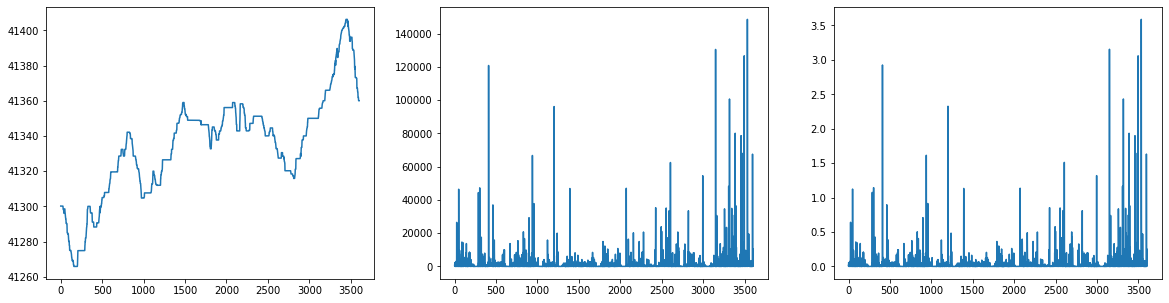

In [ ]:
prices = agg_trade.price.to_list()
dollarvolume = agg_trade.dollarvolume.to_list()
quantity = agg_trade.quantity.to_list()

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].plot(prices)
ax[1].plot(dollarvolume)
ax[2].plot(quantity)

In [ ]:
# Sample data based on dollar volume
timestamp, price, quantity = cleaner.group_by_dollarvol(agg_trade.index, prices, quantity, np.mean(agg_trade.dollarvolume))

In [ ]:
trades = pd.DataFrame({'datetime':timestamp, 'price':price, 'quantity':quantity})
trades.to_csv('./data/input_data/'+date+'/aggTrade_dollarvol.csv', index=False)

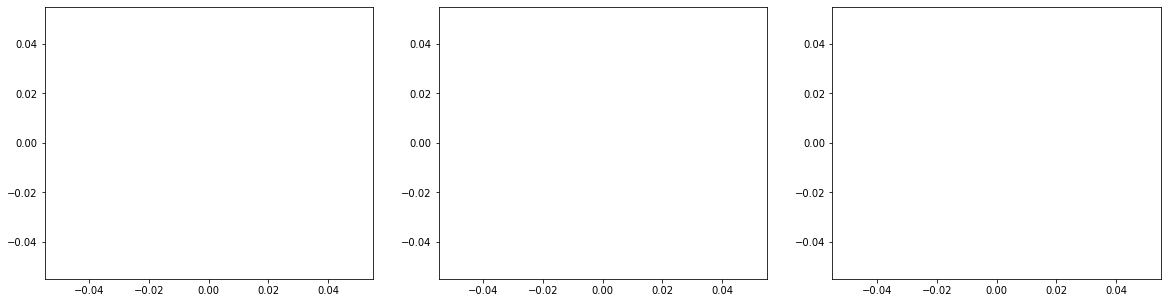

In [ ]:
fig2, ax2 = plt.subplots(1, 3, figsize = (20, 5))

ax2[0].plot(np.log(price[5000:5150]))
ax2[1].plot(np.log(price[50000:50150]))
ax2[2].plot(np.log(price[600000:600150]))

(array([1221,  834, 3269, 4821, 2285,   61,  446, 1721, 1520, 2843, 2659,
           3,    0,    0,    6,    7,    0,   28,  193,  587,  615,  250,
         123,  111,  113,   88,   24,    3,  110, 1489, 1470,  155, 1293,
        1423,  360,  261,  112,   19,    2,    0,    1,   17,  491,  796,
         805,  891,  475,  102,   49,   45,  544,  551,   66,  569, 1883,
        1866, 3285, 4112, 1379,  460,  486,   72,  191,  183,  679,  674,
           1,    6,    7,  173,  372,  198,    0,    0,    0,  206,  243,
         886, 1684, 1230,  759,  363,  731,  897, 2610, 3129, 1259, 3667,
        6040, 3440, 1496, 1722, 1637, 1113,  442,  581,  688,  385,  102,
         370,  372,  319,  896,  680,   62,  178,  527,  411,   30,    0,
           0,    0,    7,   25,   23,    5,    2,    2,    1,    1,    7,
          38,  779,  805,  928, 1094,  673,  619,  177,  247,  270,  172,
         418,  556,  306,   53,   40,  389, 2505, 2145,   59,  262,  246,
         148,  220,  142,   57,  438, 

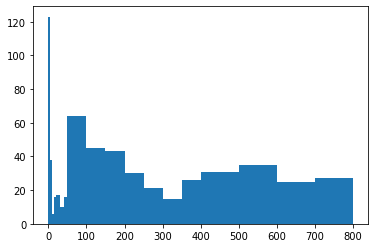

In [ ]:
plotter.timediff(timestamp)

In [ ]:
bookticker = pd.read_csv('./data/input_data/'+date+'/bookticker.csv')
bookticker_clean = cleaner.clean_bookticker('./data/input_data/'+date+'/bookticker.csv')

## Aggregating Data by Dollar Volume

In [ ]:
dates = ['09-Jun-2022','10-Jun-2022','11-Jun-2022','12-Jun-2022','13-Jun-2022','14-Jun-2022','16-Jun-2022','17-Jun-2022']
  

In [ ]:
agg_trade_orderbook = []

for date in dates:
  agg_trade_orderbook.append(pd.read_csv(f'./data/input_data/{date}/orderbook_agg_trade.csv'))

IndexError: list index out of range

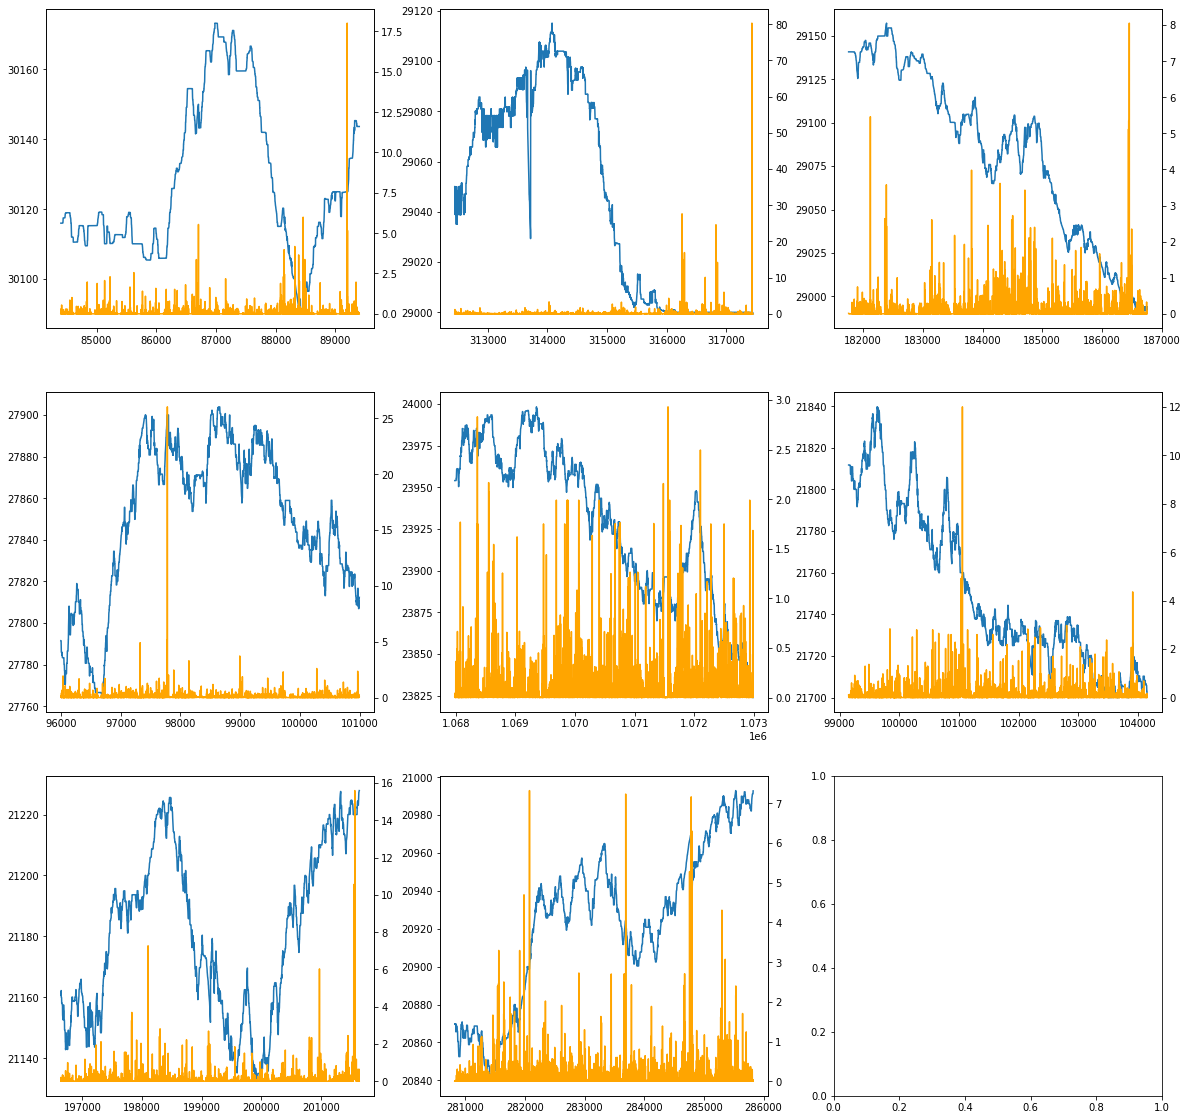

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(agg_trade_orderbook[plot_idx])-5000, size=1)
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(agg_trade_orderbook[plot_idx].price[rand[0]:rand[0]+5000])
    ax2.plot(agg_trade_orderbook[plot_idx].quantity[rand[0]:rand[0]+5000], color='orange')
    plot_idx += 1


In [ ]:
for idx in range(len(dates)):
  mean_price = np.mean(agg_trade_orderbook[idx].price)
  std_price = np.std(agg_trade_orderbook[idx].price)
  mean_qty = np.mean(agg_trade_orderbook[idx].quantity)
  std_qty = np.std(agg_trade_orderbook[idx].quantity)
  mean_dollarvol =  np.mean(agg_trade_orderbook[idx].price*agg_trade_orderbook[idx].quantity)
  std_dollarvol =  np.std(agg_trade_orderbook[idx].price*agg_trade_orderbook[idx].quantity)
  print(f'| date: {dates[idx]} | mean price: {mean_price:0.2f} ~ {std_price:0.2f} | \
mean qty {mean_qty:0.5f} ~ {std_qty:0.5f} | mean dollar vol {mean_dollarvol:0.2f} ~ {std_dollarvol:0.2f}|')

| date: 09-Jun-2022 | mean price: 30172.24 ~ 101.10 | mean qty 0.06442 ~ 0.28546 | mean dollar vol 1943.65 ~ 8610.11|
| date: 10-Jun-2022 | mean price: 29503.10 ~ 452.35 | mean qty 0.07477 ~ 0.56567 | mean dollar vol 2207.80 ~ 16889.54|
| date: 11-Jun-2022 | mean price: 29019.41 ~ 265.96 | mean qty 0.07712 ~ 0.68491 | mean dollar vol 2232.40 ~ 19665.93|
| date: 12-Jun-2022 | mean price: 27603.43 ~ 437.59 | mean qty 0.08997 ~ 0.36752 | mean dollar vol 2478.94 ~ 10097.94|
| date: 13-Jun-2022 | mean price: 24284.26 ~ 1118.95 | mean qty 0.10013 ~ 0.36758 | mean dollar vol 2444.70 ~ 9042.60|
| date: 14-Jun-2022 | mean price: 22090.03 ~ 558.12 | mean qty 0.10364 ~ 0.39003 | mean dollar vol 2287.90 ~ 8606.73|
| date: 16-Jun-2022 | mean price: 20901.99 ~ 272.61 | mean qty 0.07861 ~ 0.29286 | mean dollar vol 1640.02 ~ 6085.78|
| date: 17-Jun-2022 | mean price: 20808.65 ~ 250.80 | mean qty 0.09189 ~ 0.32087 | mean dollar vol 1911.66 ~ 6667.91|


In [ ]:
agg_trade_orderbook_all = pd.concat(agg_trade_orderbook)

agg_trade_orderbook_all['dollarvol'] = agg_trade_orderbook_all.quantity * agg_trade_orderbook_all.price

bid_cols = ['bid'+str(i) for i in range(1,11)]+['bidqty'+str(i) for i in range(1,11)]
ask_cols = ['ask'+str(i) for i in range(1,11)]+['askqty'+str(i) for i in range(1,11)]

bid_ask_cols = bid_cols+ask_cols

cols_dict = {'price':'price',
             'quantity':'quantity',
             'datetime':'datetime_y',
             'bid_ask_columns':bid_ask_cols}

median_dollar_vol = np.median(agg_trade_orderbook_all['dollarvol'])
mean_dollar_vol = np.mean(agg_trade_orderbook_all['dollarvol'])

orderbook_clean_dollarvol_all = cleaner.group_book_by_dollarvol2(agg_trade_orderbook_all, cols_dict, mean_dollar_vol)

In [ ]:
orderbook_clean_dollarvol_all.to_csv('./data/input_data/all_to_sept/orderbook_agg_trade_dollarvol.csv', index=False)

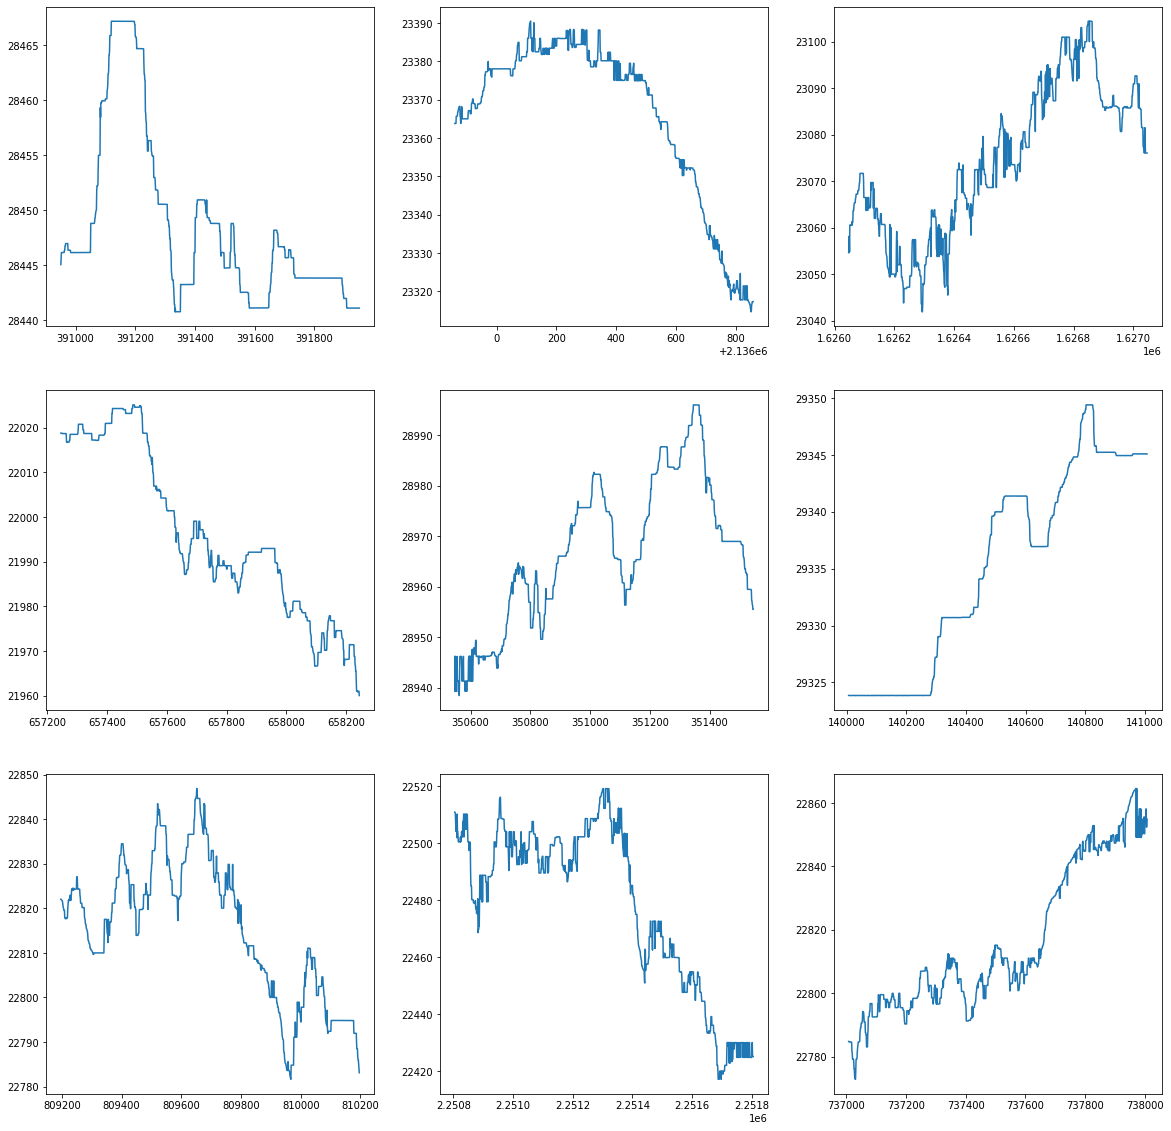

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(agg_trade_orderbook_all)-1000, size=1)
    ax[idx][jdx].plot(agg_trade_orderbook_all.price[rand[0]:rand[0]+1000])
    plot_idx += 1

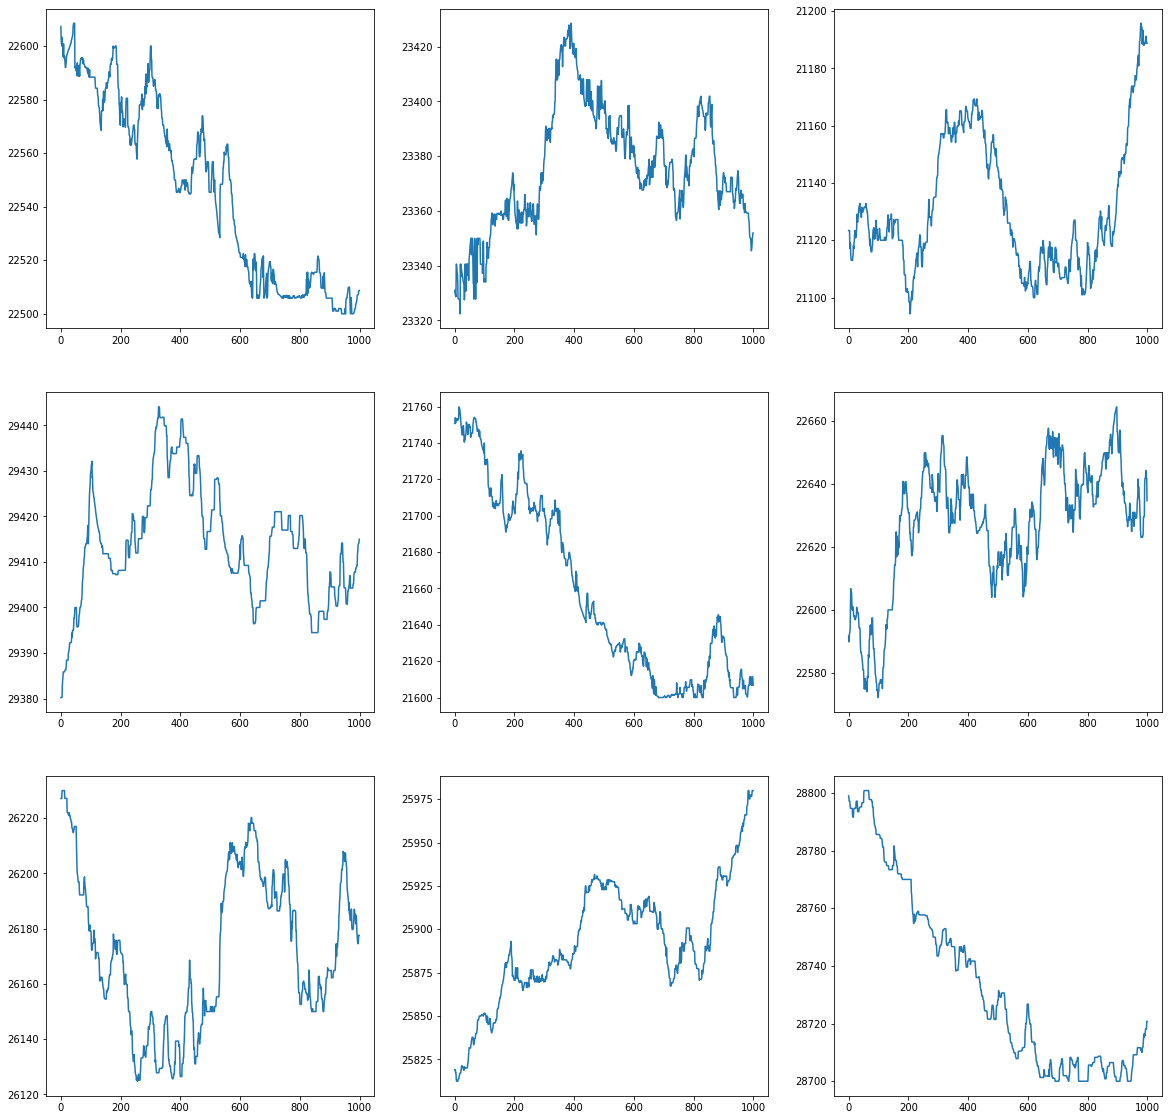

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_clean_dollarvol_all)-1000, size=1)
    ax[idx][jdx].plot(orderbook_clean_dollarvol_all.price.to_list()[rand[0]:rand[0]+1000])
    plot_idx += 1

## Exploring LOB 

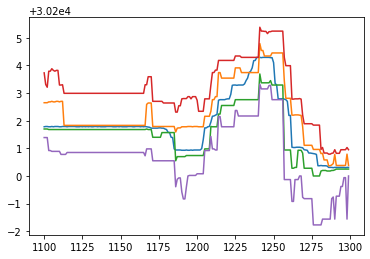

In [ ]:
plt.plot(agg_trade_orderbook_all.price[1100:1300])
plt.plot(agg_trade_orderbook_all.ask5[1100:1300])
plt.plot(agg_trade_orderbook_all.bid5[1100:1300])
plt.plot(agg_trade_orderbook_all.ask10[1100:1300])
plt.plot(agg_trade_orderbook_all.bid10[1100:1300])


In [ ]:
for idx in range(len(dates)):
  agg_trade_orderbook[idx]['dollarvol'] = agg_trade_orderbook[idx].quantity * agg_trade_orderbook[idx].price

In [ ]:
print(np.mean(agg_trade_orderbook[0]['dollarvol']))
print(np.std(agg_trade_orderbook[0]['dollarvol']))

1943.6457651619896
8610.11137619239


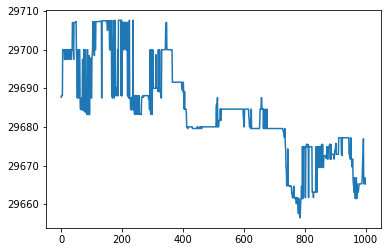

In [ ]:
plt.plot(agg_trade_orderbook[1]['price'][:1000])

In [ ]:
orderbook_clean_dollarvol = []

bid_cols = ['bid'+str(i) for i in range(1,11)]+['bidqty'+str(i) for i in range(1,11)]
ask_cols = ['ask'+str(i) for i in range(1,11)]+['askqty'+str(i) for i in range(1,11)]

bid_ask_cols = bid_cols+ask_cols

cols_dict = {'price':'price',
             'quantity':'quantity',
             'datetime':'datetime_y',
             'bid_ask_columns':bid_ask_cols}

for idx in range(len(dates)):
  median_dollar_vol = np.median(agg_trade_orderbook[idx]['dollarvol'])
  mean_dollar_vol = np.mean(agg_trade_orderbook[idx]['dollarvol'])

  orderbook_clean_dollarvol.append(cleaner.group_book_by_dollarvol2(agg_trade_orderbook[idx], cols_dict, mean_dollar_vol))

In [ ]:
for idx, date in enumerate(dates):
  orderbook_clean_dollarvol[idx].to_csv(f'./data/input_data/{date}/orderbook_agg_trade_dollarvol.csv', index=False)
  
orderbook_clean_dollarvol[0]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty1,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10
2022-06-09 17:20:46.111,2022-06-09 17:20:46.111,30210.150000,1.67972,30210.14000,30210.08500,30210.02000,30209.98000,30209.95500,30209.885001,30209.445001,...,34.21224,1.04000,1.00000,0.53090,0.02366,0.21689,3.77362,0.06800,1.73791,4.05573
2022-06-09 17:20:46.843,2022-06-09 17:20:46.843,30210.140000,0.06924,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,14.31966,0.52000,0.50000,0.34908,0.01456,0.34908,0.09642,0.00300,0.01200,0.33096
2022-06-09 17:20:47.213,2022-06-09 17:20:47.213,30210.150000,0.32538,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,39.91077,1.35397,1.51000,1.12270,0.21094,0.87998,0.41559,0.05571,0.03150,0.17548
2022-06-09 17:20:47.559,2022-06-09 17:20:47.559,30210.150000,0.20355,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,5.55148,0.26000,0.25000,0.17454,0.00728,0.17454,0.04821,0.00150,0.00600,0.00100
2022-06-09 17:20:47.741,2022-06-09 17:20:47.741,30210.150000,0.24942,30210.14000,30210.13000,30210.04000,30210.00000,30209.96000,30209.950000,30209.820000,...,5.55148,0.26000,0.25000,0.17454,0.00728,0.17454,0.04821,0.00150,0.00600,0.00100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10 00:59:54.276,2022-06-10 00:59:54.276,30106.120000,0.25611,30106.11000,30106.10000,30106.09000,30105.99000,30105.98000,30105.950000,30105.200000,...,0.45245,0.24629,0.00066,0.10000,1.24300,1.44926,0.33248,0.33247,0.00182,0.16621
2022-06-10 00:59:54.297,2022-06-10 00:59:54.297,30106.120000,0.19633,30106.11000,30106.10000,30106.09000,30105.99000,30105.98000,30105.950000,30105.200000,...,0.45245,0.24629,0.00066,0.10000,1.24300,1.44926,0.33248,0.33247,0.00182,0.16621
2022-06-10 00:59:54.454,2022-06-10 00:59:54.454,30106.213355,0.24259,30106.16875,30106.14750,30106.13375,30106.10500,30106.06125,30106.047501,30105.937503,...,0.70060,0.98762,1.39151,3.16894,8.04476,3.29226,9.23974,9.02985,0.02773,1.19914
2022-06-10 00:59:54.960,2022-06-10 00:59:54.960,30106.618534,0.06706,30106.24625,30106.23625,30106.22625,30106.20875,30106.19875,30106.175000,30106.165000,...,0.49415,0.00412,3.80000,7.06784,4.86784,5.37200,11.38782,1.46200,0.10675,6.61592


In [ ]:
orderbook_clean_dollarvol[1]

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty1,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10
2022-06-10 01:16:50.730,2022-06-10 01:16:50.730,29687.942195,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.05768,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
2022-06-10 01:16:50.737,2022-06-10 01:16:50.737,29688.090000,0.11068,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.05768,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
2022-06-10 01:16:50.755,2022-06-10 01:16:50.755,29694.318930,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.08652,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000
2022-06-10 01:16:50.771,2022-06-10 01:16:50.771,29700.000000,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.02884,0.20000,0.43205,0.25000,0.25000,0.25000,0.25000,0.25000,0.25000,0.25000
2022-06-10 01:16:50.777,2022-06-10 01:16:50.777,29700.000000,0.08000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.05768,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11 00:59:55.943,2022-06-11 00:59:55.943,29090.000000,0.92435,29089.990000,29089.980000,29089.910000,29089.760000,29089.750000,29089.740000,29089.700000,...,2.98910,0.00300,0.01000,0.01000,0.20393,0.16332,0.00300,0.01000,0.42849,0.68077
2022-06-11 00:59:55.959,2022-06-11 00:59:55.959,29091.042044,0.22729,29089.990000,29089.980000,29089.910000,29089.760000,29089.750000,29089.740000,29089.700000,...,14.94550,0.01500,0.05000,0.05000,1.01965,0.81660,0.01500,0.05000,2.14245,3.40385
2022-06-11 00:59:57.008,2022-06-11 00:59:57.008,29091.189923,0.09268,29091.031255,29091.015005,29090.967506,29090.921256,29090.755004,29090.535003,29090.467503,...,17.33439,2.02224,4.68485,0.04500,1.11091,4.32425,5.05520,0.04500,0.48449,0.71577
2022-06-11 00:59:58.062,2022-06-11 00:59:58.062,29091.190000,0.08835,29091.180000,29091.170000,29091.120000,29091.110000,29090.950000,29090.800000,29090.600000,...,0.95643,0.02993,0.00300,0.00750,0.42849,0.00250,1.00924,0.00300,0.00750,0.00250


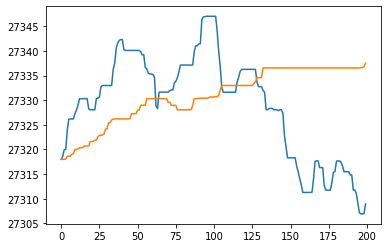

In [ ]:
plt.plot(orderbook_clean_dollarvol[3]['price'][:200].to_list())
plt.plot(agg_trade_orderbook[3]['price'][:200].to_list())

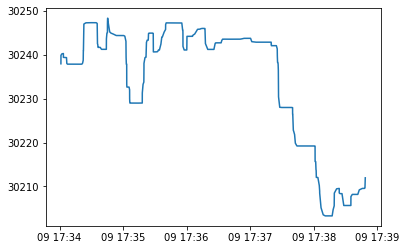

In [ ]:
plt.plot(orderbook_clean_dollarvol[0].price[1100:1500])

In [ ]:
orderbook_clean_dollarvol[1] = orderbook_clean_dollarvol[1].assign(
    vwap=orderbook_clean_dollarvol[1].eval(
        'wgtd = price * quantity', inplace=False
    ).groupby(orderbook_clean_dollarvol[1].index.date).cumsum().eval('wgtd / quantity')
)

orderbook_clean_dollarvol[1] 

,datetime,price,quantity,bid1,bid2,bid3,bid4,bid5,bid6,bid7,...,askqty2,askqty3,askqty4,askqty5,askqty6,askqty7,askqty8,askqty9,askqty10,vwap
2022-06-10 01:16:50.731,2022-06-10 01:16:50.731,29687.991463,0.12000,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,29687.991463
2022-06-10 01:16:50.740,2022-06-10 01:16:50.740,29688.090000,0.10884,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.40000,0.86410,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,29688.038329
2022-06-10 01:16:50.758,2022-06-10 01:16:50.758,29700.000000,0.12184,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,29692.194283
2022-06-10 01:16:50.780,2022-06-10 01:16:50.780,29699.166942,0.12100,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.80000,1.72820,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,29693.982978
2022-06-10 01:16:50.793,2022-06-10 01:16:50.793,29698.024159,0.18524,29683.210000,29682.990000,29679.580000,29674.680000,29660.130000,29656.450000,29656.440000,...,0.60000,1.29615,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,0.75000,29695.122521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10 09:52:11.002,2022-06-10 09:52:11.002,30043.376366,0.20287,30045.000000,30044.950000,30044.930000,30043.820000,30043.370000,30043.080000,30043.070000,...,22.89050,5.88768,0.66638,0.02512,1.32560,5.48764,0.50590,0.66634,0.79800,30011.660517
2022-06-10 09:52:11.030,2022-06-10 09:52:11.030,30042.323365,0.17332,30045.000000,30044.950000,30044.930000,30043.820000,30043.370000,30043.080000,30043.070000,...,22.89050,5.88768,0.66638,0.02512,1.32560,5.48764,0.50590,0.66634,0.79800,30011.660789
2022-06-10 09:52:11.670,2022-06-10 09:52:11.670,30040.205912,0.09190,30040.285061,30040.260060,30040.103399,30039.636753,30039.253432,30039.166756,30038.800074,...,4.31970,29.45468,17.29424,88.34045,29.55008,33.74224,7.55196,16.36936,19.29941,30011.660923
2022-06-10 09:52:12.289,2022-06-10 09:52:12.289,30038.990000,0.16630,30038.990000,30038.950000,30038.900000,30037.890000,30037.590000,30037.450000,30037.130000,...,0.00320,0.25000,0.33329,7.98140,12.92453,0.33140,3.34018,0.00732,0.78085,30011.661156


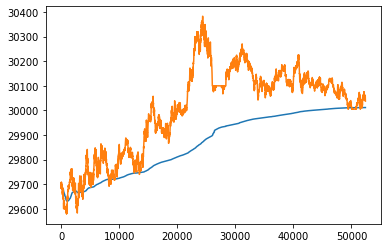

In [ ]:
plt.plot(orderbook_clean_dollarvol[1].vwap.to_list()[:])
plt.plot(orderbook_clean_dollarvol[1].price.to_list()[:])


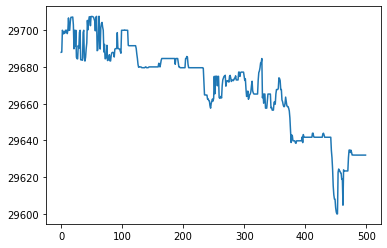

In [ ]:
plt.plot(orderbook_clean_dollarvol[1].price.to_list()[:500])

## Orderbook

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from utils import cleaner
import utils.plotter as plotter

In [3]:
#dates = ['09-Jun-2022','10-Jun-2022','11-Jun-2022','12-Jun-2022','13-Jun-2022','14-Jun-2022','16-Jun-2022','17-Jun-2022','18-Jun-2024']
#dates = ['15-Aug-2024','16-Aug-2024']
dates = ['15-Aug-2024', '16-Aug-2024','19-Aug-2024','20-Aug-2024','21-Aug-2024']

#dates = ['09-Jun-2022']


orderbook = []

for idx, date in enumerate(dates):
    orderbook.append(pd.read_csv(f'./data/input_data/{date}/orderbook.csv'))

In [4]:
for idx, date in enumerate(dates):
    orderbook[idx]['w_midprice'] = (orderbook[idx]['ask1']*orderbook[idx]['askqty1']+orderbook[idx]['bid1']*orderbook[idx]['bidqty1'])/(orderbook[idx]['askqty1']+orderbook[idx]['bidqty1'])

orderbook_all = pd.concat(orderbook)

In [38]:
orderbook_all.to_csv('./data/input_data/all/orderbook.csv')

In [5]:
orderbook_all.set_index('datetime', inplace=True)
orderbook_all.sort_index(ascending=True, inplace=True)

(4306372, 42)

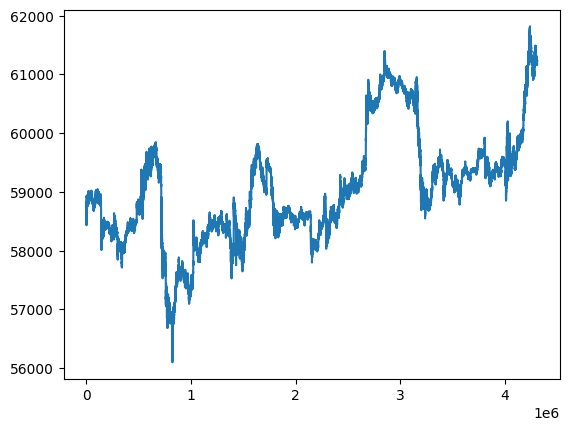

In [6]:
plt.plot(orderbook_all.w_midprice.to_list())
orderbook_all.shape

(3966730, 42)


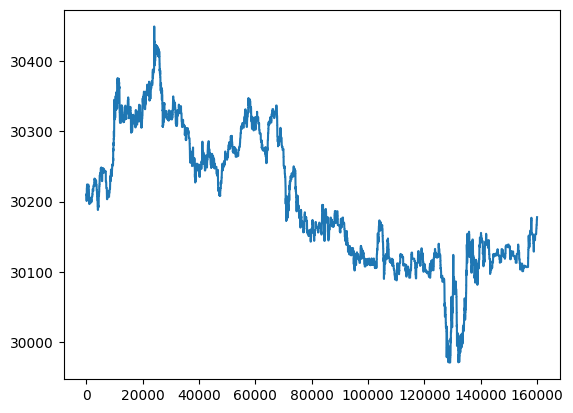

In [52]:
from IPython.display import clear_output
import time
li = orderbook_all.w_midprice.to_list()
print(orderbook_all.shape)
#for a in range(10000):
#    plt.plot(li[a:a+1000])
#    #wait for 1 sec
a =3000
plt.plot(li[a:a+160000])



/tmp/ipykernel_1332394/185061747.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  updates = orderbook_all.lastUpdatedId[rand[0]+1000]-orderbook_all.lastUpdatedId[rand[0]]


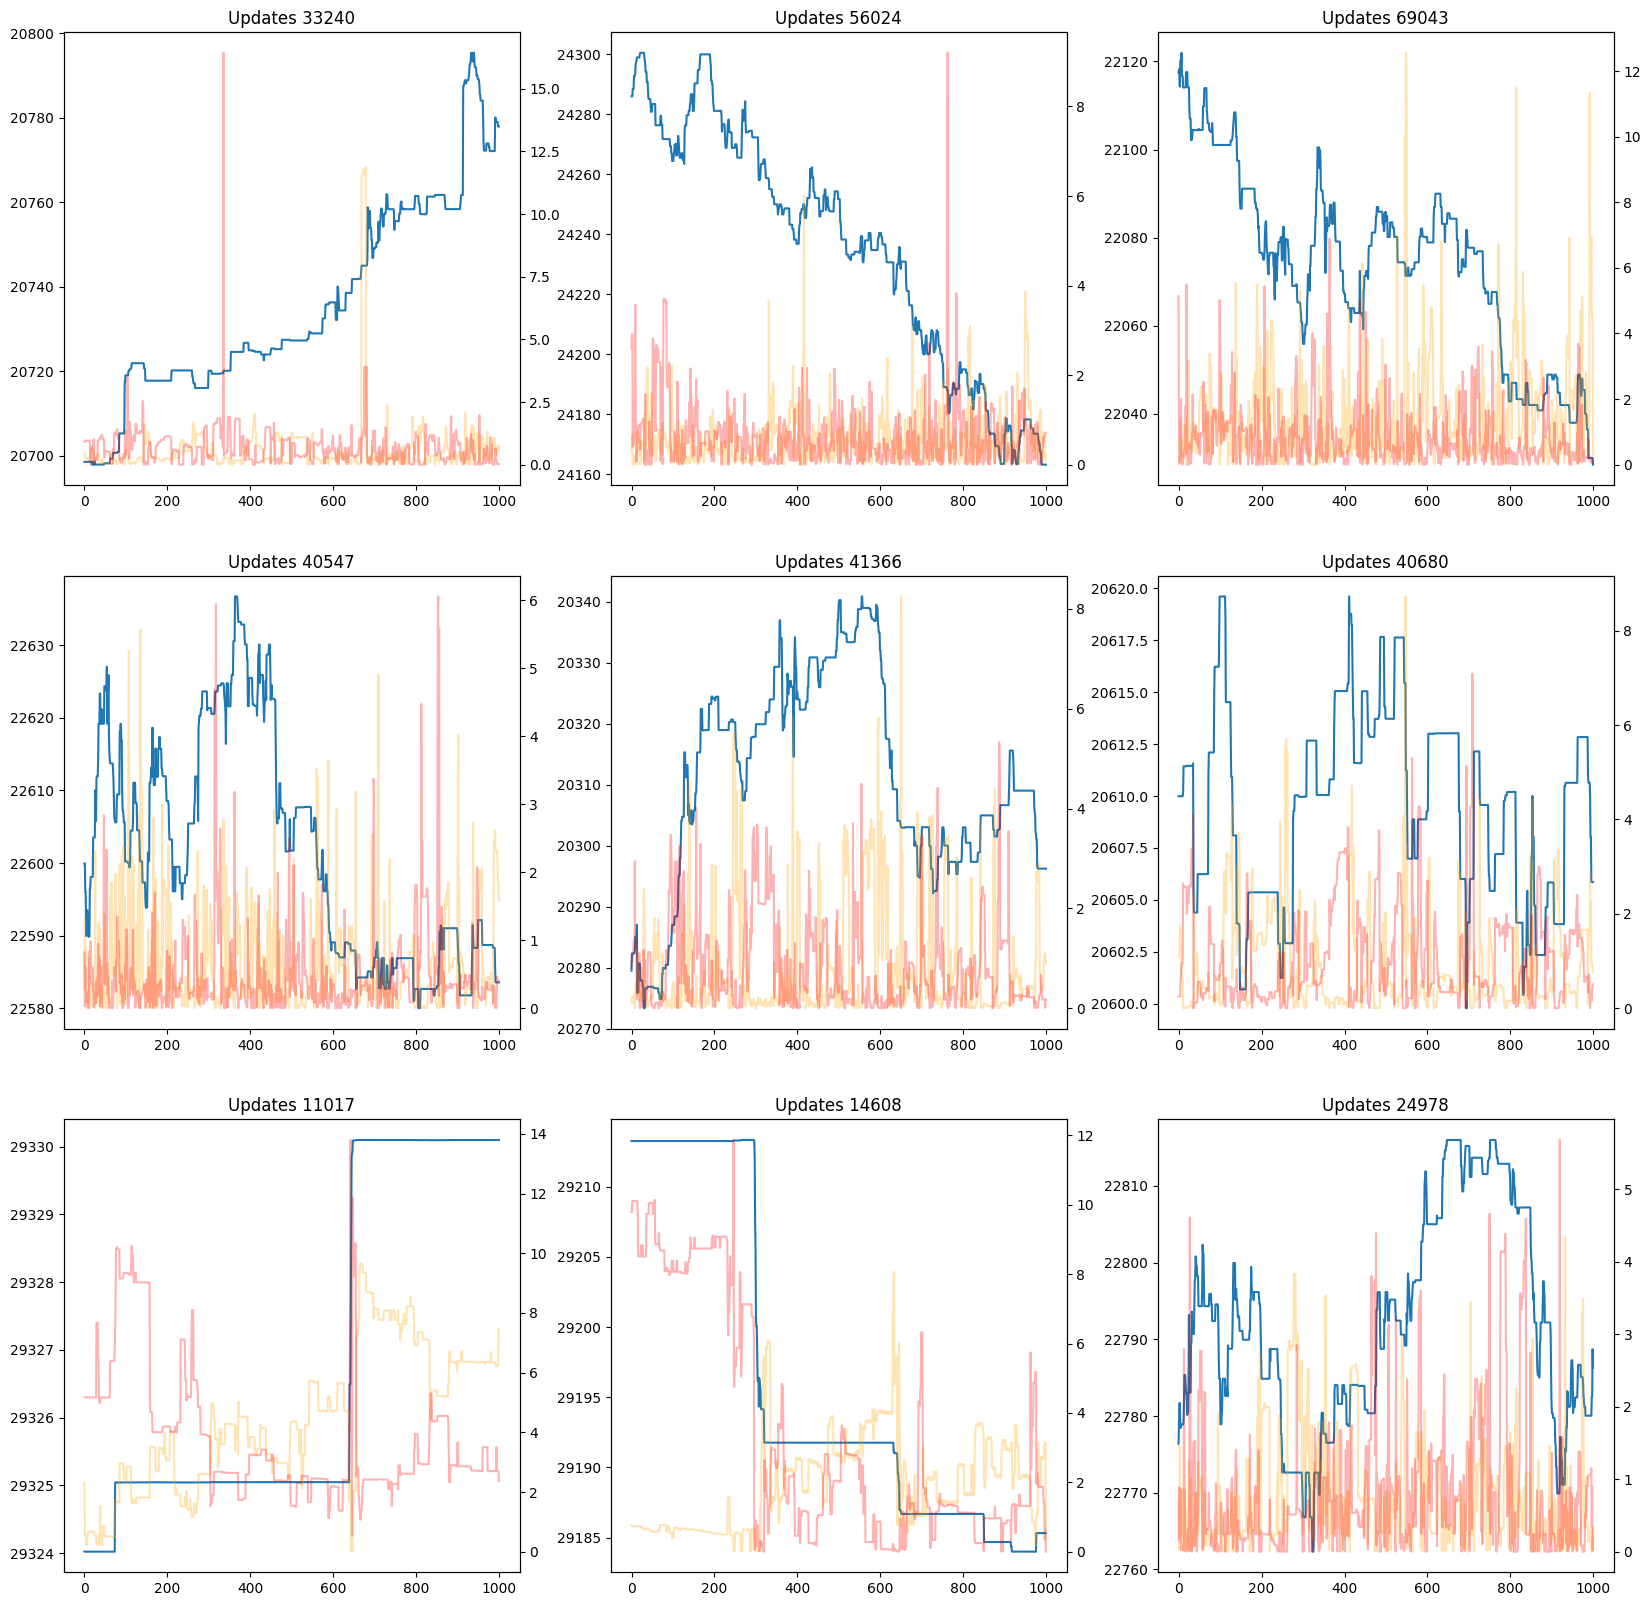

In [53]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all)-1000, size=1)
    # duration = (datetime.datetime.strptime(orderbook_all.datetime[rand[0]+1000],'%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(orderbook_all.datetime[rand[0]],'%Y-%m-%d %H:%M:%S.%f')).seconds 
    updates = orderbook_all.lastUpdatedId[rand[0]+1000]-orderbook_all.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange', alpha=0.3)
    ax2.plot(orderbook_all.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red',alpha=0.3)
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

In [54]:
orderbook_all['update_diff'] = orderbook_all['lastUpdatedId'] - orderbook_all['lastUpdatedId'].shift(1)


In [55]:
orderbook_all.to_csv('./data/input_data/all/orderbook_test.csv')

In [45]:
orderbook_all_active = orderbook_all[orderbook_all['update_diff'] > 9]

In [46]:
orderbook_all_active.to_csv('./data/input_data/all/orderbook_active.csv')

/tmp/ipykernel_4131986/2687477281.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  updates = orderbook_all_active.lastUpdatedId[rand[0]+1000]-orderbook_all_active.lastUpdatedId[rand[0]]


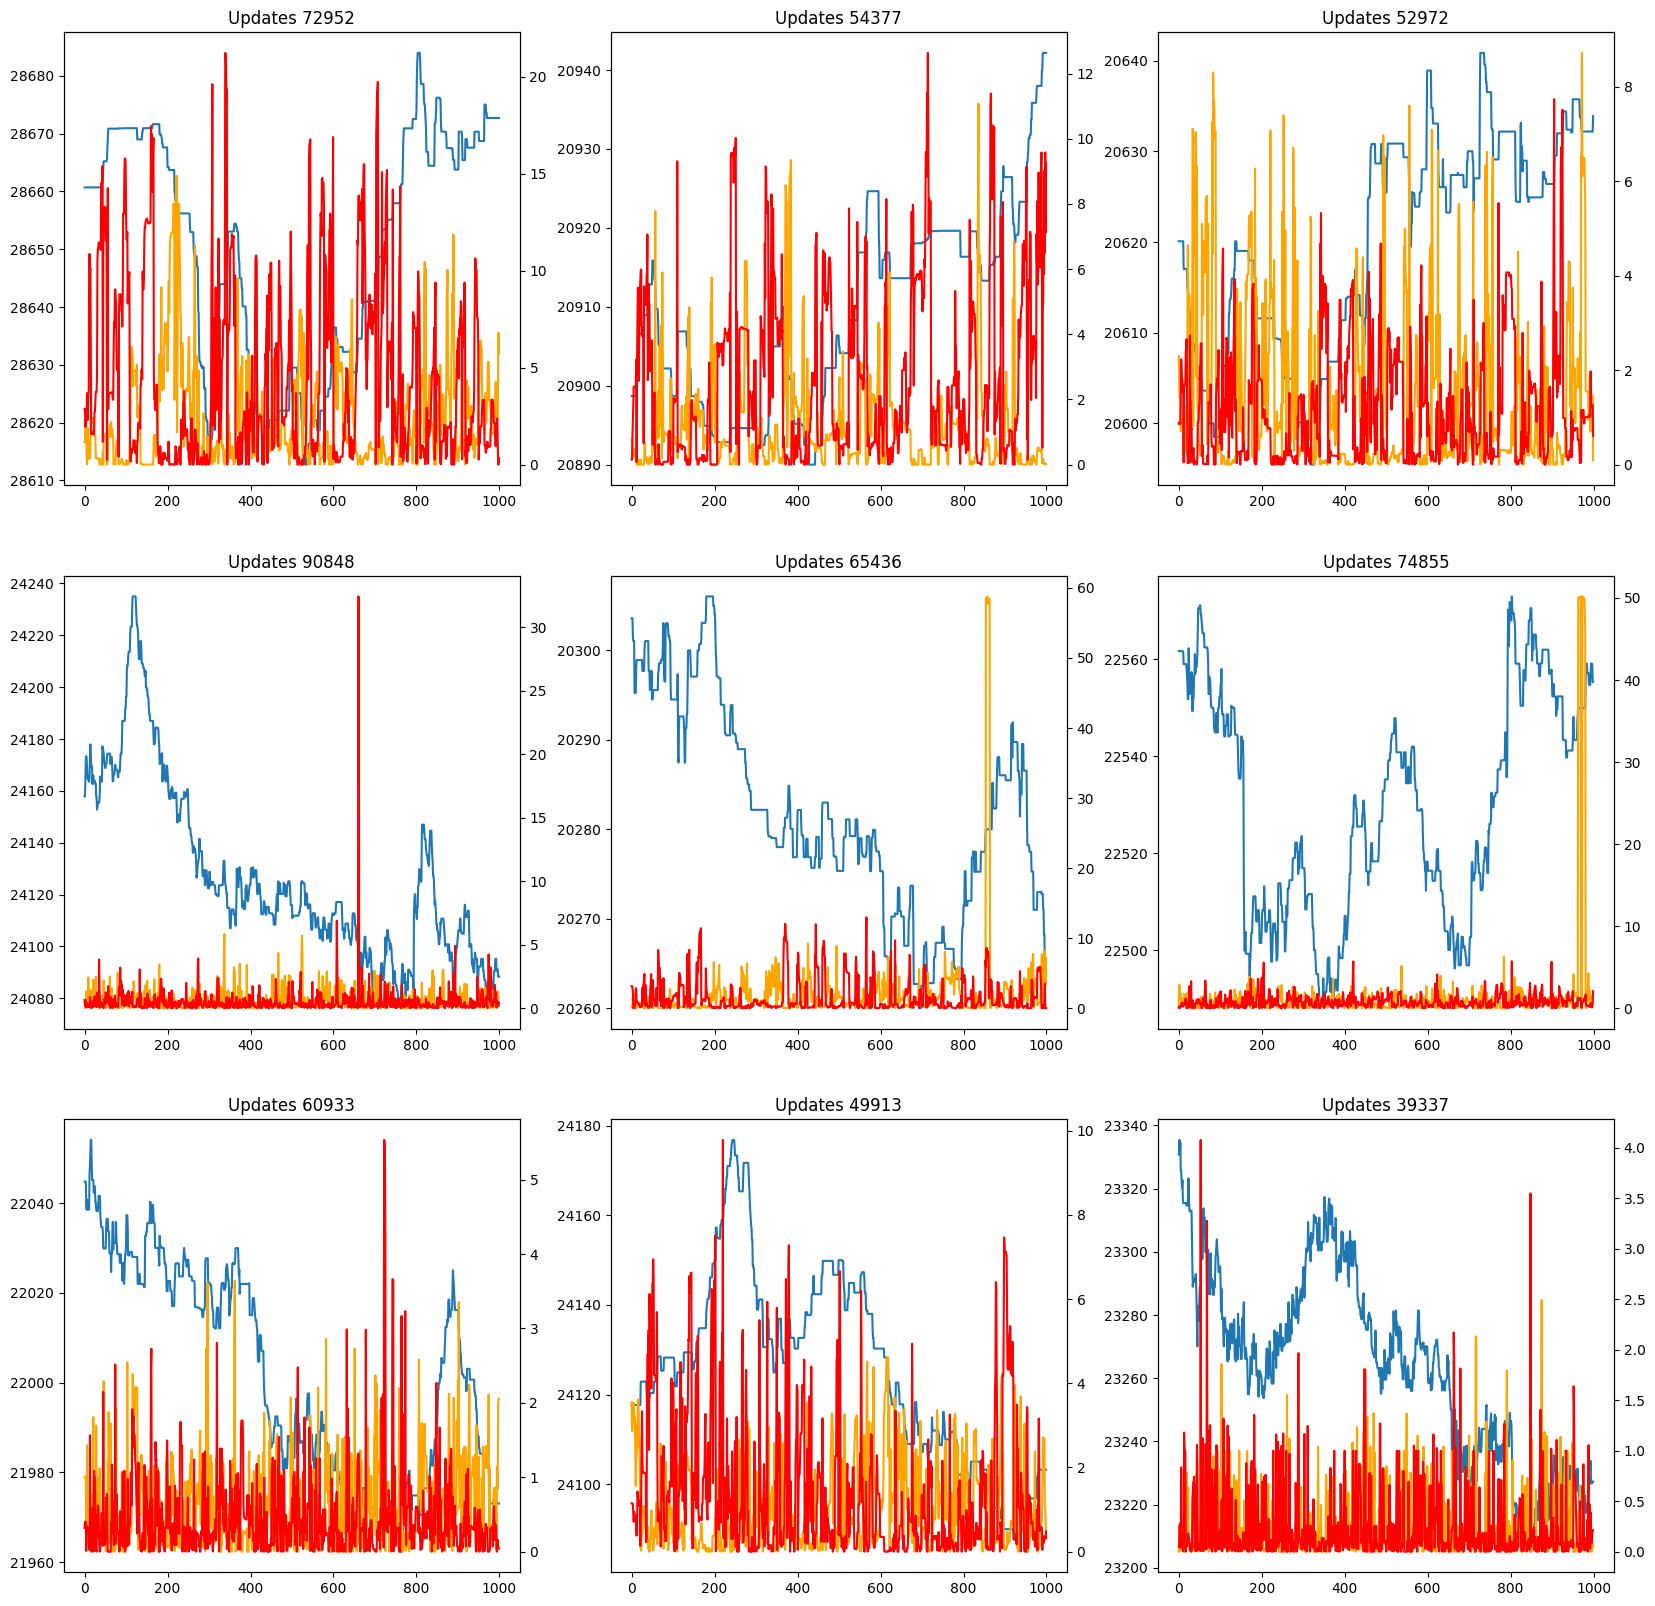

In [47]:
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(orderbook_all_active)-1000, size=1)
    updates = orderbook_all_active.lastUpdatedId[rand[0]+1000]-orderbook_all_active.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(orderbook_all_active.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(orderbook_all_active.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange')
    ax2.plot(orderbook_all_active.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red')
    ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

NameError: name 'orderbook_all_active' is not defined

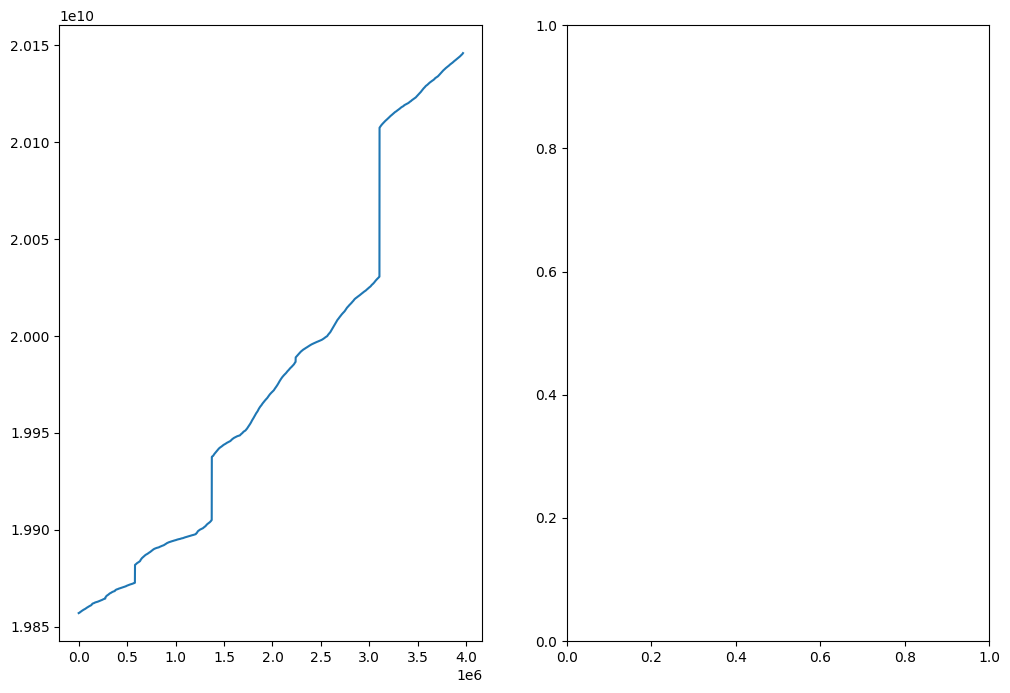

In [56]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))

ax[0].plot(orderbook_all.lastUpdatedId.to_list())
ax[1].plot(orderbook_all_active.lastUpdatedId.to_list())

In [49]:
id2 = np.array(orderbook_all.lastUpdatedId.to_list()[1:])
id1 = np.array(orderbook_all.lastUpdatedId.to_list()[:-1])

In [17]:
diff = id2-id1

print(f'mean: {np.mean(diff)}')
print(f'std: {np.std(diff)}')
print(f'min: {np.min(diff)}')

mean: 72.87618564313317
std: 42150.334508284424
min: 1


In [18]:
orderbook_all = pd.read_csv('./data/input_data/all/orderbook.csv')

In [19]:
orderbook_all['returns'] = (orderbook_all['w_midprice']-orderbook_all['w_midprice'].shift(1))/orderbook_all['w_midprice'].shift(1)
orderbook_all['log_returns'] = (np.log(orderbook_all['w_midprice'])-np.log(orderbook_all['w_midprice'].shift(1)))

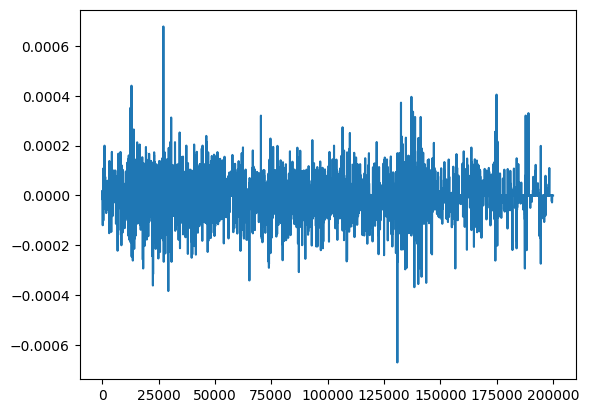

In [20]:
plt.plot(orderbook_all.log_returns[:200_000])

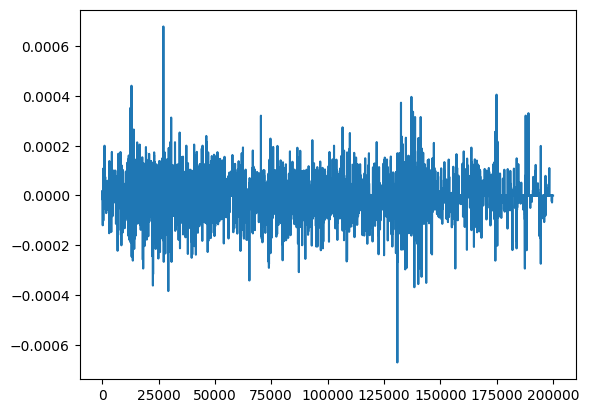

In [21]:
plt.plot(orderbook_all.returns[:200_000])

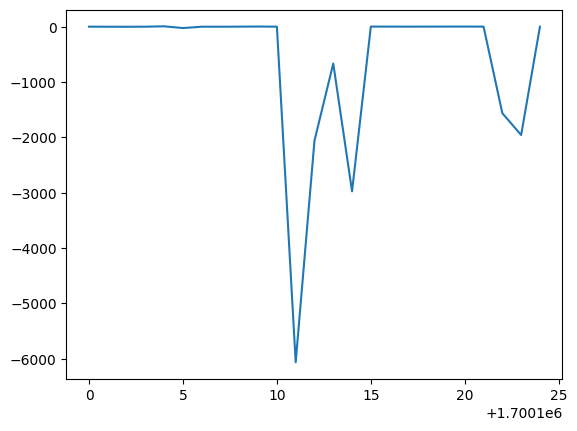

In [22]:
idx=1700000
plt.plot((orderbook_all.returns[idx+100:idx+125]/np.subtract(*np.percentile(orderbook_all.returns[idx:idx+100], [75, 25], axis=0)))-np.mean(orderbook_all.returns[idx:idx+100]))

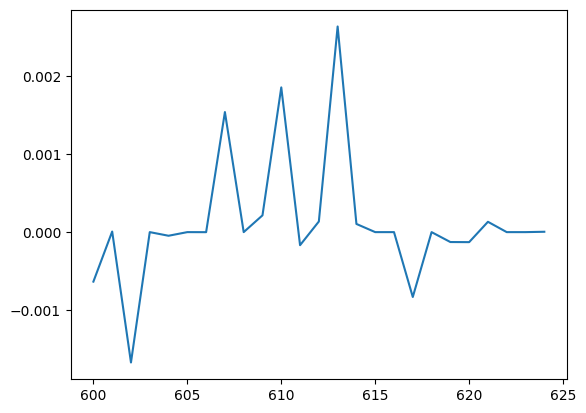

In [23]:
idx=500
plt.plot(orderbook_all.returns[idx+100:idx+125]/np.std(orderbook_all.returns[idx:idx+100])-np.median(orderbook_all.returns[idx:idx+100]))

In [24]:
orderbook = pd.read_csv('./data/input_data/all/orderbook.csv')

In [25]:
orderbook['rate_lag30'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-30))
orderbook['rate_lag15'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-15))
orderbook['rate_lag1'] = np.log(orderbook['w_midprice']/orderbook['w_midprice'].shift(periods=-1))

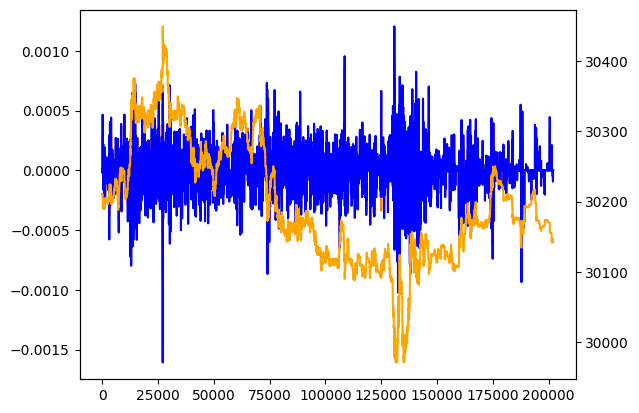

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(orderbook.rate_lag1[0:2_02_000])
ax1.plot(orderbook.rate_lag15[0:2_02_000])
ax1.plot(orderbook.rate_lag30[0:2_02_000],color = 'blue')
ax2.plot(orderbook.w_midprice[0:2_02_000], color='orange')

In [27]:
orderbook['returns_lag'] = np.log(orderbook['w_midprice'].shift(1)/orderbook['w_midprice'].shift(2))*10000
orderbook['mid_price_diff'] = orderbook['w_midprice']-orderbook['w_midprice'].shift(1)

In [28]:
orderbook_2 = orderbook[orderbook['mid_price_diff'] != 0]
orderbook_2.drop(columns=['returns_lag','mid_price_diff'], inplace=True)

/tmp/ipykernel_4131986/2347865041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderbook_2.drop(columns=['returns_lag','mid_price_diff'], inplace=True)


In [29]:
orderbook_2

,Unnamed: 0,datetime,lastUpdatedId,ask1,askqty1,ask2,askqty2,ask3,askqty3,ask4,...,bid8,bidqty8,bid9,bidqty9,bid10,bidqty10,w_midprice,rate_lag30,rate_lag15,rate_lag1
0,0,2022-06-09 16:20:45.380,19856938285,30210.15,9.76695,30210.37,0.26000,30211.05,0.2500,30211.63,...,30208.92,0.00300,30208.68,0.66204,30208.63,0.01925,30210.147441,2.280619e-07,4.621009e-08,1.983606e-09
1,1,2022-06-09 16:20:45.481,19856938307,30210.15,9.46662,30210.37,0.26000,30211.05,0.2500,30211.06,...,30208.92,0.00300,30208.68,0.66204,30208.63,0.01925,30210.147381,-1.831929e-05,3.352634e-08,0.000000e+00
4,4,2022-06-09 16:20:45.781,19856938343,30210.15,8.71662,30210.37,0.26000,30211.05,0.2500,30211.06,...,30209.07,0.00150,30208.96,0.00235,30208.68,0.66204,30210.147218,-1.830975e-05,4.136507e-08,-1.220676e-10
5,5,2022-06-09 16:20:45.881,19856938364,30210.15,8.96662,30210.37,0.26000,30211.05,0.2500,30211.06,...,30209.07,0.00150,30208.96,0.00235,30208.68,0.66204,30210.147222,-1.848267e-05,3.900192e-08,1.239514e-08
6,6,2022-06-09 16:20:45.981,19856938378,30210.15,8.96564,30210.37,0.26000,30211.05,0.2500,30211.06,...,30209.07,0.00150,30208.96,0.00235,30208.68,0.66204,30210.146848,-1.859525e-05,4.814940e-08,1.455474e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966725,492062,2022-06-17 13:41:33.996,20146017839,20843.18,0.61195,20843.35,0.00150,20843.49,0.2000,20843.60,...,20839.48,0.01000,20839.14,0.05200,20838.99,0.28000,20843.174479,NaN,NaN,4.804470e-08
3966726,492063,2022-06-17 13:41:34.096,20146017894,20843.18,0.45717,20843.35,0.00150,20843.49,0.2000,20843.60,...,20838.99,0.28000,20838.66,0.10000,20838.02,0.23992,20843.173478,NaN,NaN,1.609865e-07
3966727,492064,2022-06-17 13:41:34.196,20146017931,20843.18,0.03619,20843.35,0.00150,20843.49,0.2000,20843.60,...,20838.99,0.28000,20838.66,0.10000,20838.18,0.99132,20843.170122,NaN,NaN,-8.150357e-06
3966728,492065,2022-06-17 13:41:34.296,20146018031,20843.35,0.00150,20843.40,0.00051,20843.48,0.0011,20843.49,...,20840.77,0.23989,20840.40,0.60000,20839.48,0.01000,20843.340002,NaN,NaN,-1.866359e-04


In [30]:
orderbook_2.to_csv('./data/input_data/all/orderbook_test_lags.csv', index=False)

In [31]:
orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))

/tmp/ipykernel_4131986/3076540589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderbook_2['lag_return'] = np.log(orderbook_2['w_midprice'].shift(10)/orderbook_2['w_midprice'].shift(10+1))


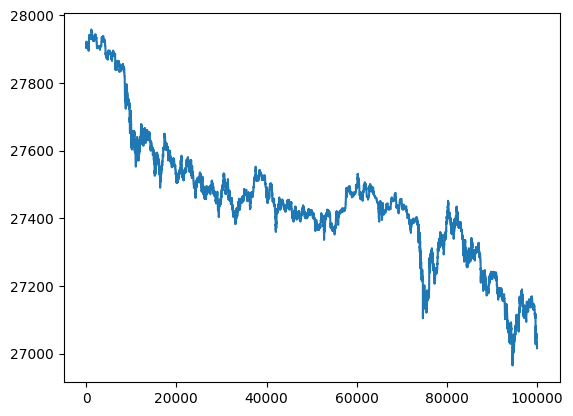

In [32]:
plt.plot(orderbook_2.w_midprice[1_000_000:1_100_000].to_list())

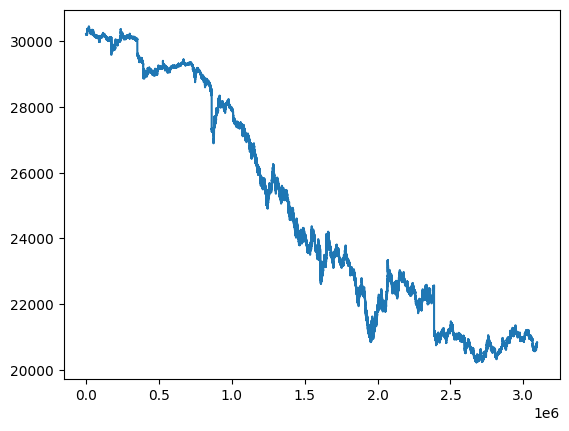

In [33]:
plt.plot(orderbook_2.w_midprice.to_list())


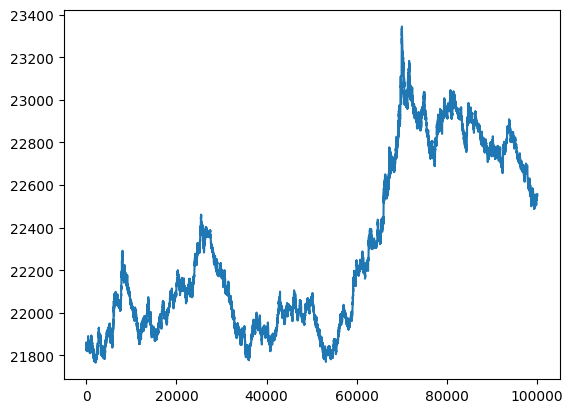

In [34]:
plt.plot(orderbook_2.w_midprice[2_000_000:2_100_000].to_list())

In [65]:
import pandas as pd

def drop_duplicate_w_midprice(file_path: str, output_path: str) -> pd.DataFrame:
    """
    Load the CSV file, drop rows with duplicated 'w_midprice' values, and save the result.

    :param file_path: Path to the input CSV file.
    :param output_path: Path to save the output CSV file.
    :return: DataFrame after dropping duplicates.
    """
    # Load the dataset
    orderbook = pd.read_csv(file_path)

    # Drop all rows with duplicated 'w_midprice'
    orderbook_drop_midprice = orderbook.drop_duplicates(subset='w_midprice')

    # Save the resulting DataFrame to a new CSV file
    #orderbook_drop_midprice.to_csv(output_path, index=False)

    return orderbook_drop_midprice

# Example usage
input_file = './data/input_data/all/orderbook_test.csv'
output_file = './output_data/orderbook_drop_midprice.csv'
result_df = drop_duplicate_w_midprice(input_file, output_file)

# Print a sample of the resulting DataFrame
print(result_df.head(),result_df.shape)

                  datetime  lastUpdatedId      ask1  askqty1      ask2  \
0  2022-06-09 16:20:45.380    19856938285  30210.15  9.76695  30210.37   
1  2022-06-09 16:20:45.481    19856938307  30210.15  9.46662  30210.37   
4  2022-06-09 16:20:45.781    19856938343  30210.15  8.71662  30210.37   
5  2022-06-09 16:20:45.881    19856938364  30210.15  8.96662  30210.37   
6  2022-06-09 16:20:45.981    19856938378  30210.15  8.96564  30210.37   

   askqty2      ask3  askqty3      ask4  askqty4  ...      bid7  bidqty7  \
0     0.26  30211.05     0.25  30211.63  0.00728  ...  30209.07  0.00150   
1     0.26  30211.05     0.25  30211.06  0.17454  ...  30209.07  0.00150   
4     0.26  30211.05     0.25  30211.06  0.17454  ...  30209.82  0.00062   
5     0.26  30211.05     0.25  30211.06  0.17454  ...  30209.82  0.00062   
6     0.26  30211.05     0.25  30211.06  0.17454  ...  30209.82  0.00062   

       bid8  bidqty8      bid9  bidqty9     bid10  bidqty10    w_midprice  \
0  30208.92   0.0030 

[30210.246781602946, 30210.24678121625]


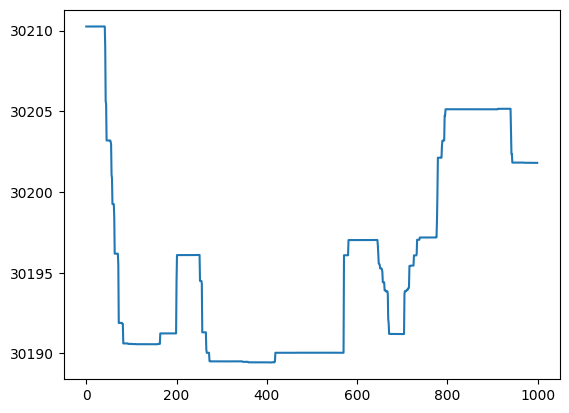

In [68]:
l = result_df['w_midprice'].to_list()
import matplotlib.pyplot as plt
plt.plot(l[100:1100])
print(l[100:102])

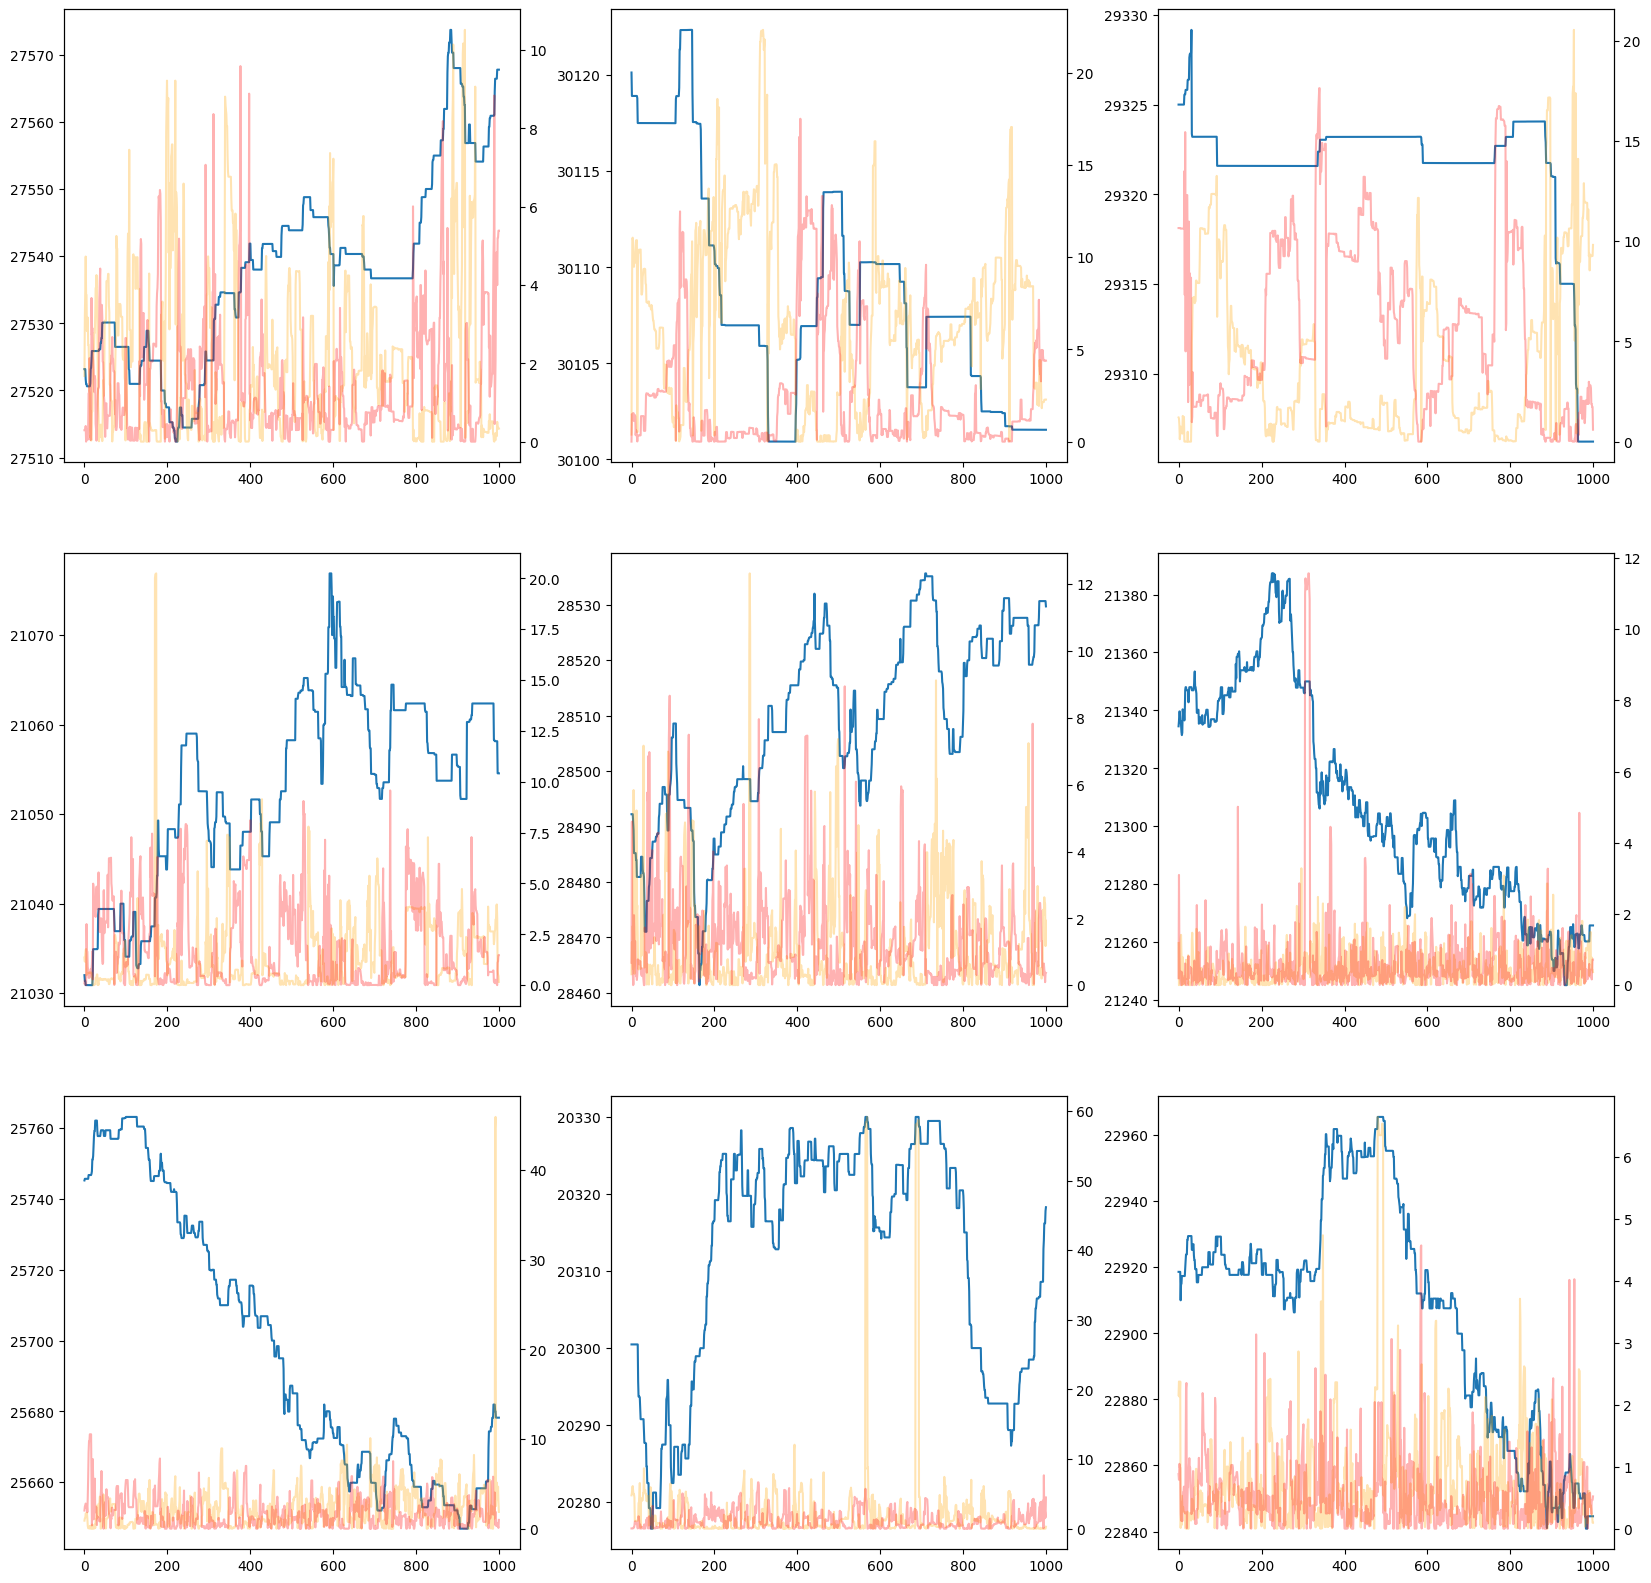

In [59]:
import numpy as np
fig, ax = plt.subplots(3, 3, figsize = (20, 20))

plot_idx = 0
for idx in range(3):
  for jdx in range(3):
    rand = np.random.randint(0, len(result_df)-1000, size=1)
    # duration = (datetime.datetime.strptime(orderbook_all.datetime[rand[0]+1000],'%Y-%m-%d %H:%M:%S.%f') - datetime.datetime.strptime(orderbook_all.datetime[rand[0]],'%Y-%m-%d %H:%M:%S.%f')).seconds 
    #updates = result_df.lastUpdatedId[rand[0]+1000]-result_df.lastUpdatedId[rand[0]]
    ax2 = ax[idx][jdx].twinx()
    ax[idx][jdx].plot(result_df.w_midprice.tolist()[rand[0]:rand[0]+1000])
    ax2.plot(result_df.askqty1.to_list()[rand[0]:rand[0]+1000], color='orange', alpha=0.3)
    ax2.plot(result_df.bidqty1.to_list()[rand[0]:rand[0]+1000], color='red',alpha=0.3)
    #ax[idx][jdx].set_title(f'Updates {updates}')
    plot_idx += 1

In [91]:
result_df['log_returns'] = (np.log(result_df['w_midprice'])-np.log(result_df['w_midprice'].shift(30)))

(3076915,)


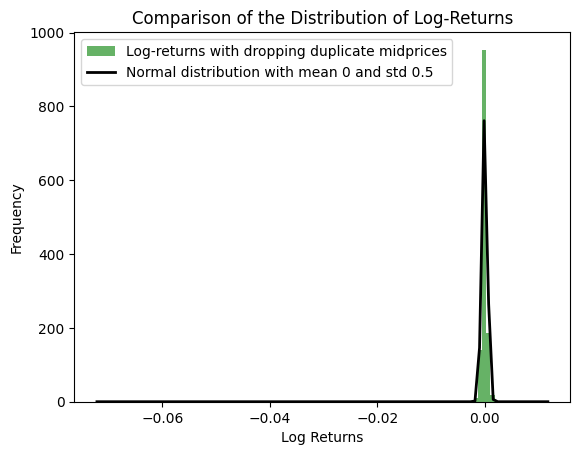

In [92]:
log_returns = result_df['log_returns']

# Create a histogram of the log_returns
plt.hist(log_returns, bins=100, density=True, alpha=0.6, color='g', label='Log-returns with dropping duplicate midprices')

# Overlay a normal distribution for comparison
mu, std = np.mean(log_returns), np.std(log_returns)
#mu, std = 0,0.5
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-((x - mu) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))

plt.plot(x, p, 'k', linewidth=2, label='Normal distribution with mean 0 and std 0.5')

# Adding titles and labels
plt.title('Comparison of the Distribution of Log-Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()
print(log_returns.shape)
# Show the plot
plt.show()

Descriptive Statistics of log_returns after dropping duplicates:
count    1.207161e+06
mean    -9.658689e-07
std      6.710173e-04
min     -6.837708e-02
25%     -3.055037e-04
50%     -2.638593e-06
75%      2.870835e-04
max      7.961354e-03
Name: log_returns, dtype: float64
Mean: -9.658688976242312e-07, Std: 0.0006710170125617865


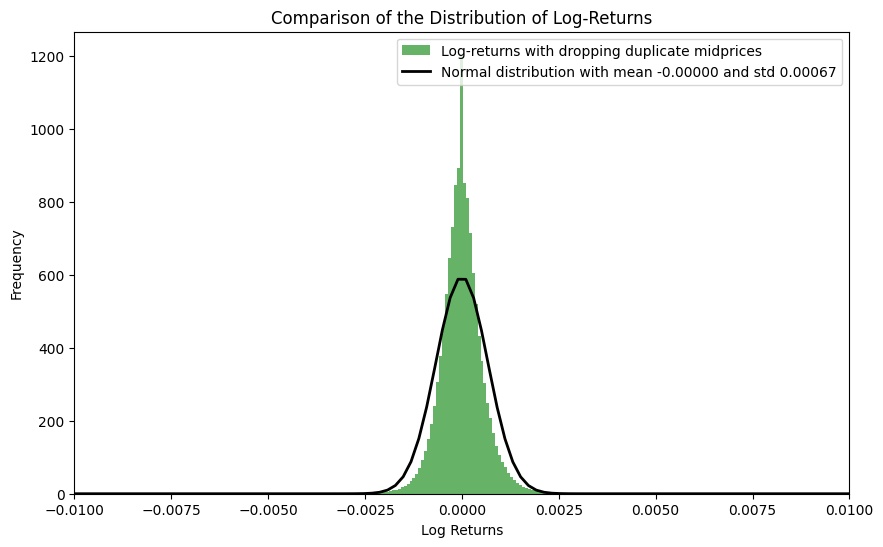

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def drop_near_duplicate_midprice(df: pd.DataFrame, column: str, precision: int = 3) -> pd.DataFrame:
    """
    Drops rows from the DataFrame where the `column` values are considered duplicates
    if they are the same up to a specified number of decimal places.
    
    :param df: Input DataFrame
    :param column: The column in which to check for duplicates
    :param precision: Number of decimal places to consider for identifying duplicates
    :return: DataFrame with near-duplicate rows dropped
    """
    # Round the specified column to the desired precision
    df[f'{column}_rounded'] = df[column].round(precision)
    
    # Drop duplicates based on the rounded column
    df_deduped = df.drop_duplicates(subset=f'{column}_rounded').drop(columns=[f'{column}_rounded'])
    
    return df_deduped

# Load your DataFrame (assuming `df` is already defined, e.g., `df = pd.read_csv(...)`)
df = result_df

# Drop near-duplicate midprices
df_deduped = drop_near_duplicate_midprice(df, 'w_midprice', precision=3)

# Extract the log_returns column
log_returns = df_deduped['log_returns']

# Check the descriptive statistics of log_returns to ensure they are valid
print("Descriptive Statistics of log_returns after dropping duplicates:")
print(log_returns.describe())

# Automatically adjust x-axis limits based on data
xmin, xmax = log_returns.min(), log_returns.max()
xrange = xmax - xmin
xmin -= xrange * 0.05  # Add a small margin to the minimum
xmin = -0.01
xmax += xrange * 0.05  # Add a small margin to the maximum
xmax= 0.01
# Plotting the histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=1000, density=True, alpha=0.6, color='g', label='Log-returns with dropping duplicate midprices')

# Calculate the mean and standard deviation of the log_returns
mu, std = np.mean(log_returns), np.std(log_returns)
print(f"Mean: {mu}, Std: {std}")

# Ensure that mean and std are not zero before plotting
if std > 0:
    # Generate a normal distribution with the same mean and standard deviation
    x = np.linspace(xmin, xmax, 100)
    p = np.exp(-((x - mu) ** 2) / (2 * std ** 2)) / (std * np.sqrt(2 * np.pi))
    
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal distribution with mean {mu:.5f} and std {std:.5f}')
else:
    print("Standard deviation is zero; skipping normal distribution plot.")

# Adding titles and labels
plt.title('Comparison of the Distribution of Log-Returns')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.legend()

# Set x-axis limits to the automatically calculated range
plt.xlim(xmin, xmax)

# Show the plot
plt.show()

[30210.147440867768, 30210.146407806704, 30210.145392906965, 30210.144074207863, 30210.14195784228] 1207170


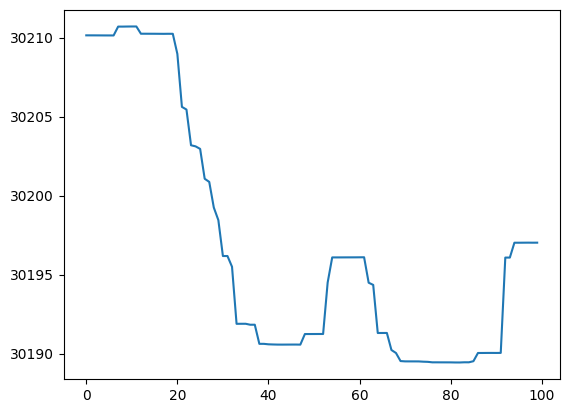

In [118]:
l = df_deduped['w_midprice'].tolist()
plt.plot(l[0:100])
print(l[0:5],len(l))


In [104]:
df_deduped

,datetime,lastUpdatedId,ask1,askqty1,ask2,askqty2,ask3,askqty3,ask4,askqty4,...,bidqty7,bid8,bidqty8,bid9,bidqty9,bid10,bidqty10,w_midprice,update_diff,log_returns
0,2022-06-09 16:20:45.380,19856938285,30210.15,9.76695,30210.37,0.26000,30211.05,0.25000,30211.63,0.00728,...,0.00150,30208.92,0.00300,30208.68,0.66204,30208.63,0.01925,30210.147441,NaN,NaN
7,2022-06-09 16:20:46.081,19856938386,30210.15,7.37775,30210.37,0.26000,30211.05,0.25000,30211.06,0.17454,...,0.00062,30209.07,0.00150,30208.96,0.00235,30208.68,0.66204,30210.146408,8.0,NaN
21,2022-06-09 16:20:47.483,19856938647,30210.15,5.55148,30210.37,0.26000,30211.05,0.25000,30211.06,0.17454,...,0.00062,30209.68,0.00331,30208.96,0.00235,30208.68,0.66204,30210.145393,13.0,NaN
22,2022-06-09 16:20:47.583,19856938677,30210.15,3.55275,30210.37,0.01000,30211.06,0.17454,30211.63,0.00728,...,0.00062,30209.68,0.00331,30208.96,0.00235,30208.68,0.66204,30210.144074,30.0,NaN
26,2022-06-09 16:20:47.983,19856938759,30210.15,1.51806,30210.37,0.01000,30211.63,0.00728,30212.21,0.00150,...,0.00972,30209.82,0.00062,30209.68,0.00331,30209.13,0.55991,30210.141958,31.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966716,2022-06-17 13:41:33.095,20146017441,20845.96,0.09791,20846.04,0.00714,20846.43,0.00350,20847.24,0.07680,...,0.23987,20841.58,0.27340,20841.57,0.27340,20840.41,0.27340,20845.950558,40.0,-0.000176
3966718,2022-06-17 13:41:33.295,20146017623,20842.98,0.11092,20843.18,0.00051,20843.35,0.00150,20845.02,0.00596,...,0.27340,20840.40,0.82597,20840.13,0.23987,20839.48,0.01000,20842.970774,55.0,-0.000205
3966720,2022-06-17 13:41:33.495,20146017710,20843.18,0.47661,20843.35,0.00150,20845.02,0.00596,20845.96,0.12208,...,0.54036,20840.41,0.27340,20840.40,0.82597,20839.48,0.01000,20843.173790,24.0,-0.000184
3966722,2022-06-17 13:41:33.696,20146017757,20843.18,0.59193,20843.19,0.00501,20843.35,0.00150,20843.49,0.20000,...,0.27340,20840.40,0.60000,20839.48,0.01000,20839.14,0.05200,20843.173143,19.0,-0.000013


In [111]:
original = pd.read_csv( './data/input_data/all/orderbook_test.csv')
original.shape

(3966730, 44)

In [ ]:
original.